# Analyse du pendule simple

Commençons par importer les librairies usuelles de calcul scientifique et de dessin

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
%matplotlib notebook

## L'équation du pendule

On considère un pendule simple de masse ponctuelle $m$ située au point $M$ est soumise à son poids $m\mathbf{g}$ et à la tension $\mathbf{T}$ du cable de longueur $L$ qui relie cette masse au point $O$. La position de $M$ est repérée par l'angle $\theta (t)$ entre la verticale et le cable. Par projection sur l'axe porté par $\mathbf{e}_\theta$ dans le système de coordonnée polaire, le théorème de la résultante dynamique permet d'écrire:

$$ mL \theta''(t) = -mg\sin(\theta(t)).$$

On obtient ainsi l'équation différentielle satisfaite par $\theta(t)$:

$$ \theta''(t) = -\omega^2 \sin(\theta(t)), \quad\quad\quad (3.1) $$

avec $\omega = \sqrt{\frac g L}$. La position initiale du pendule est notée $\theta_0$ et sa vitesse initiale est $\theta_0'=\dot{\theta}_0$. Le problème à résoudre s'écrit donc:

$$\left\{\begin{array}{ll}
\theta''(t) + \omega^2 \sin(\theta(t)) = 0,\\
\theta(0) = \theta_0, \; \theta'(0) =\dot{\theta}_0 .
\end{array}\right.\quad\quad\quad (3.2)$$

Le problème $(3.2)$ est maintenant reformulé sous la forme d'un système d'ordre $1$. On pose $x_1(t) = \theta(t)$ et $x_2(t) = \theta'(t)$ pour obtenir

$$\left\{\begin{array}{ll}
x_1'(t) = x_2(t),
\\ x_2'(t) = \displaystyle -\omega^2\sin(x_1(t)),
\end{array}\right.$$

de sorte qu'avec $X = (x_1,x_2)^t$, le système $(3.2)$ devient

$$\left\{\begin{array}{ll}
X'(t) = F(X(t)),
\\ X(0) = X_0.
\end{array}\right.$$

> **A faire :** Pour mettre en oeuvre les méthodes de calcul approché des solutions de $(3.3)$, écrire une fonction qui calcule $F(X)$.



In [2]:
# Definir la fonction F
def F(x):
    return np.array([x[1], -(w0**2)*np.sin(x[0])])

> **A faire :** Écrire les fonctions mettant en oeuvre les méthodes d'Euler explicite, de Heun et de Runge-Kutta d'ordre 2 et 4. 

>Le schéma de **Euler implicite** est comme suivante:
$\left\{\begin{array}{ll}
X_{n+1} = X_{n} + h F(X_{n})
\\ X_{0} = X(0) = (\frac{\pi}{4},0)
\end{array}\right.$ <br> <br>

In [3]:
### Schéma de Euler explicite de pas constante h
def Eulerexp(x):
    return x+h*F(x)

>Le schéma de **Heun** est comme suivante:
$\left\{\begin{array}{ll}
X_{n+1} =X_n+\frac{\Delta t}{2}(F(X_n )+F(X_n+ \Delta t F(X_n )))
\\ X_{0} = X(0) = (\frac{\pi}{4},0)
\end{array}\right.$ <br> <br>

In [4]:
### Schéma de Heun de pas constante h
def heun(x):
    return x + h*F(x+h/2*F(x))

>Le schéma de **RK2** est comme suivante:
$\left\{\begin{array}{ll}
X_{n+1} =X_n+\Delta tF(X_n +\frac{\Delta t}{2}F(X_n))
\\ X_{0} = X(0) = (\frac{\pi}{4},0)
\end{array}\right.$ <br> <br>

In [5]:
### Schéma de Runge-Kutta d'ordre 2 de pas constante h
def RK2(x):
    k1 = F(x)
    k2 = F(x+h/2*k1)
    return x+h*k2

>Le schéma de **RK4** est comme suivante:
$\left\{\begin{array}{ll}
X_{n,1}=F(X_n)
\\X_{n,2}=F(X_n+\frac{\Delta t}{2}X_{n,1})
\\X_{n,3}=F(X_n+\frac{\Delta t}{2}X_{n,2})
\\X_{n,4}=F(X_n+\Delta tX_{n,3})
\\X_{n+1} =X_n+\frac{\Delta t}{6}(X_{n,1}+2X_{n,2}+2X_{n,3}+X_{n,4}) 
\end{array}\right.$ <br> <br>

In [6]:
### Schéma de Runge-Kutta d'ordre 4 de pas constante h
def RK4(x):
    k1 = F(x)
    k2 = F(x+h/2*k1)
    k3 = F(x+h/2*k2)
    k4 = F(x+h*k3)
    return x +h/6*(k1+2*k2+2*k3+k4)

> **A faire :** Écrire un programme principal qui calcule et représente les solutions approchées par ces quatre méthodes, sur l'intervalle $[0,8]$, avec un pas $h = \frac 8 {200}$. Vous comparerez notamment les périodes obtenues.

In [7]:
T = 8              # Le temps final, on va répresenter les solutions numérics sur l'intervalle [0,T]           
h= 8/200        # Le pas de temps pour chaque itération, on fixe le pas de temps dans ce cas
nbrStep  = int(T/h)      # Le nombre d'iterations
time = np.linspace(0,8,nbrStep+1)     # L'intervalle de temps sont uniformément répartis
g = 10            # La constante de gravité
l = 0.5            # La longeur du cable
w0 = np.sqrt(g/l)         # La fréquence propre du pendule
x0 = np.array([np.pi/4,0])  # Les conditions initiales, on suppose à t = 0, la vitesse du pendule est nulle
tau = 2*np.pi/w0            # La periode, calculee a partir de la pulsation

<IPython.core.display.Javascript object>


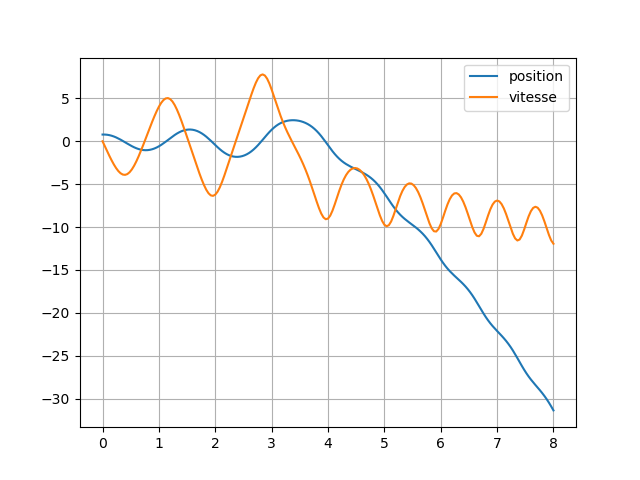

In [8]:
# Implémentation du schéma Euler explicite
x_exp = [x0.copy()] 
for i in range(nbrStep):
    x_exp += [Eulerexp(x_exp[-1])]
x_exp = np.array(x_exp) 


### On fait le graphe de l'évolution de l'amplitude et de la vitesse du pendule
fig = plt.figure('La Simulation pendule méthode de Euler explicite h='+str(h)+"s")
plt.plot(time,x_exp[:,0],label='position')
plt.plot(time,x_exp[:,1],label='vitesse')
plt.grid()
plt.legend()
plt.show()

> **Remarque** :On observe que la méthode de Euler explicite donne un mauvais résultat quand le temps augmente, la période a tendance à décroître. Cette faiblesse s'explique par le fait que la méthode est d'ordre 1 et que le pas de temp $h$ n'est pas assez petit.<br> <br>
On s'interesse maintenant aux méthodes plus "confiables".

<IPython.core.display.Javascript object>


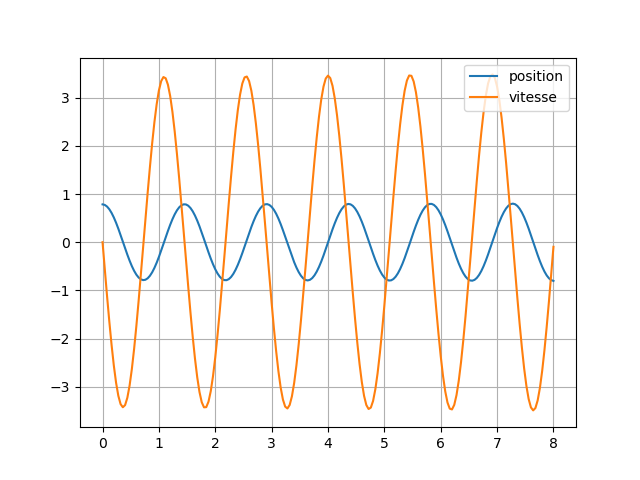

In [9]:
### Implémentation du schéma Heun
x_heun = [x0.copy()]
for i in range(nbrStep):
    x_heun += [heun(x_heun[-1])]
    
x_heun = np.array(x_heun)     ### convertir en numpy vecteur


### On fait le graphe de l'évolution de l'amplitude et de la vitesse du pendule
fig = plt.figure('Simulation pendule méthode de Heun h='+str(h)+"s")
plt.plot(time,x_heun[:,0],label='position')
plt.plot(time,x_heun[:,1],label='vitesse')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


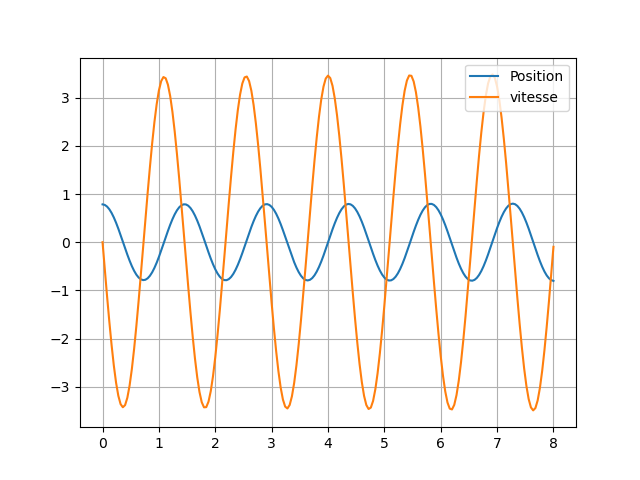

In [10]:
### Implémentation du schéma Runge-Kutta 2
x_rk2 = [x0.copy()]
for i in range(nbrStep):
    x_rk2 += [RK2(x_rk2[-1])]
x_rk2 = np.array(x_rk2)


### On fait le graphe de l'évolution de l'amplitude et de la vitesse du pendule
fig = plt.figure('Simulation pendule méthode de RK2 avec h='+str(h)+"s")
plt.plot(time,x_rk2[:,0],label='Position')
plt.plot(time,x_rk2[:,1],label='vitesse')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


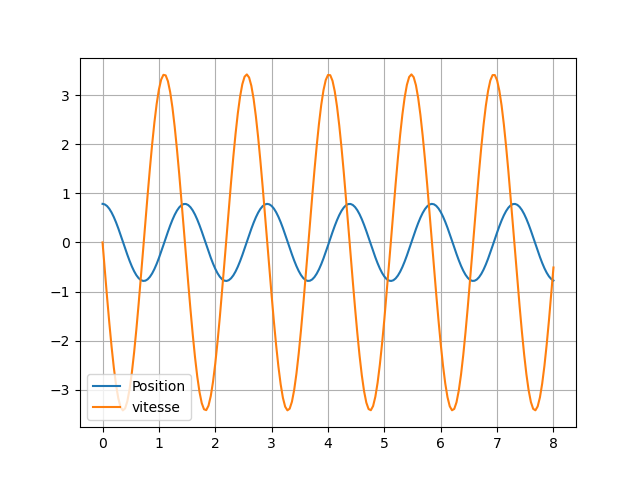

In [11]:
### Implémentation du schéma Runge-Kutta 4 
x_rk4 = [x0.copy()]
for i in range(nbrStep):
    x_rk4 += [RK4(x_rk4[-1])]
x_rk4 = np.array(x_rk4)


### On fait le graphe de l'évolution de l'amplitude et de la vitesse du pendule
fig = plt.figure('Simulation pendule méthode de RK4 avec h='+str(h)+"s")
plt.plot(time,x_rk4[:,0],label='Position')
plt.plot(time,x_rk4[:,1],label='vitesse')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


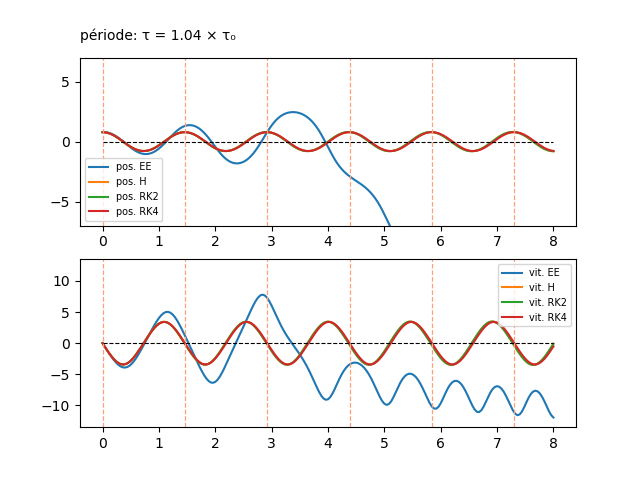

In [12]:
fig = plt.figure("superposition des différentes méthodes")

###position
ax1 = plt.subplot(211)
ax1.plot(time,x_exp[:,0],label="pos. EE")
ax1.plot(time,x_heun[:,0],label="pos. H")
ax1.plot(time,x_rk2[:,0],label="pos. RK2")
ax1.plot(time,x_rk4[:,0],label="pos. RK4")
#ax1.plot(time,3.5*x_rk4[:,0],label="_pos. RK4 acc",c='pink',ls='--')
#creation de lignes verticales (pour illustrer la periode)
for i in range(6):
    ax1.axvline(i*1.04*tau,c='lightsalmon',lw=0.9,ls='--') #1.04 choisi pour convenir
#cosmetique
ax1.set_ylim(-7,7) #ax1.set_ylim(-10,10)
y = [-5,0,5] #y = [-10,-5,0,5,10]
ax1.set_yticks(y)
ax1.plot(time,0*time,c="black",lw=0.8,ls='--')
ax1.legend(loc='lower left',prop={'size':7})
ax1.text(-0.4,8.5,'période: τ = 1.04 × τ₀')

#vitesse
ax2 = plt.subplot(212)
ax2.plot(time,x_exp[:,1],label="vit. EE")
ax2.plot(time,x_heun[:,1],label="vit. H")
ax2.plot(time,x_rk2[:,1],label="vit. RK2")
ax2.plot(time,x_rk4[:,1],label="vit. RK4")
#creation de lignes verticales
for i in range(6):
    ax2.axvline(i*1.04*tau,c='lightsalmon',lw=0.9,ls='--') #poisson norvegien tres bon
#cosmetique
ax2.set_ylim(-13.5,13.5)
y = [-10,-5,0,5,10]
ax2.set_yticks(y)
ax2.plot(time,0*time,c="black",lw=0.8,ls='--')
ax2.legend(prop={'size':7})

>**Remarque**:Les schémas de Heun, de RK2 et de RK2 ont tous la même période $\tau\approx\frac{2\pi}{\omega_0}$. Cependant, pour le schéma d'Euler explicite, la période n'est pas seulement différente de $\tau$, elle ne reste même pas constante !

Pour cette équation, l'énergie mécanique $\mathcal{E}(t)$ est définie par
$$
\mathcal{E}(t) = \frac{1}{2} m L^2 (\theta'(t))^2 - m g L \cos \theta(t).
$$
Ce système étant conservatif, cette énergie est conservée au cours du temps.

> **A faire :** Pour chacun des schémas ci-dessus, tracer l'évolution de $\displaystyle \frac {\mathcal{E}(t)} m$ sur $(0,T)$ pour un pas de temps $h=\frac 8 {200}$.
Commentez les résultats.

In [13]:
### Definition la fonction de l'energie
def E(x):
    return 1/2*l**2*x[:,1]**2-g*l*np.cos(x[:,0])

In [14]:
E_exp = E(x_exp)                 # Vecteur de l'evolution de l'energie par méthode Euler explicite

E_heun = E(x_heun)            # Vecteur de l'evolution de l'energie par méthode Heun

E_rk2 = E(x_rk2)                  # Vecteur de l'evolution de l'energie par méthode Runge-Kutta d'ordre 2

E_rk4 = E(x_rk4)                  # Vecteur de l'evolution de l'energie par méthode Runge-Kutta d'ordre 4

<IPython.core.display.Javascript object>


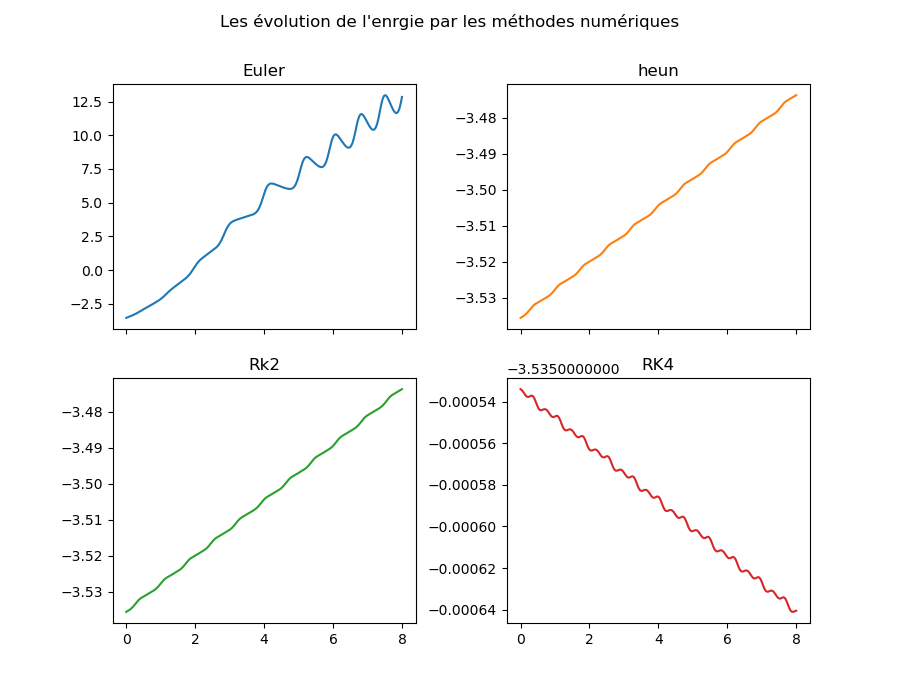

In [15]:
# On répresente l'évolution de l'energie par les diffierentes méthodes
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(9, 7))
fig.suptitle("Les évolution de l'enrgie par les méthodes numériques")
axs[0, 0].plot(time,E_exp)
axs[0, 0].set_title('Euler')
axs[0, 1].plot(time,E_heun, 'tab:orange')
axs[0, 1].set_title('heun')
axs[1, 0].plot(time, E_rk2, 'tab:green')
axs[1, 0].set_title('Rk2')
axs[1, 1].plot(time, E_rk4, 'tab:red')
axs[1, 1].set_title('RK4')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)


>**Remarque**:Comme on peut deviner, le méthode Euler explicite donne une mauvais graphique sur l'évolution de l'energie, l'erreur est trop grande. Pour les autres méthodes, bien que les erreurs sont petites, elles ne produissent pas une satisfaisante simulation, concrètement, $\mathcal{E}(t)$ s’éloigne de $\mathcal{E}_0$ au cours de temps (soit croissante, soit décroissante) même avec la méthode de RK4 qui est consistante d’ordre 4. Cette faiblesse peut donc entraine une erreur considerable au cas de grand temps final T. 

## Excitation du pendule

On s'intéresse maintenant au cas du pendule excité, c'est à dire soumis à une force extérieure de la forme
$$ f(t) = \cos(\omega t) \mathbf{e}_{\theta}.$$
La dynamique du système devient alors
$$\left\{\begin{array}{ll}
\theta''(t) + \omega^2 \sin(\theta(t)) = \cos(\omega t),\\
\theta(0) = \theta_0, \; \theta'(0) =\dot{\theta}_0 .
\end{array}\right.\quad\quad\quad $$
aux vues des résultats précédents, nous allons considérer dans la suite la méthode Heun. Dans le cas d'un problème non autonome de la forme $X'(t)= F(X(t)) + b(t)$, le schéma de Heun, de pas constant $h$ s'écrit
$$
X_{n+1}  = X_n + \frac{h}{2} \big( F(X_n)  +  F(X_n + h \left( b(t_n) + F(X_n) \right)   \big) + \frac{h}{2} \big( b(t_n) + b(t_{n+1})  \big).
$$

> **A faire :** Modifier le code de l'algorithme de Heun afin de prendre en compte le second membre. Effectuer une analyse en fonction de $\omega$. En particulier, prendre des valeurs telles que $\omega \to \omega_0$.

In [16]:
def b(t):
    return np.array([0,np.cos(w*t)])

def Heun(x,t):
    return x+h/2*(F(x)+F(x+h*(b(t)+F(x))))+h/2*(b(t)+b(t+h))

<IPython.core.display.Javascript object>


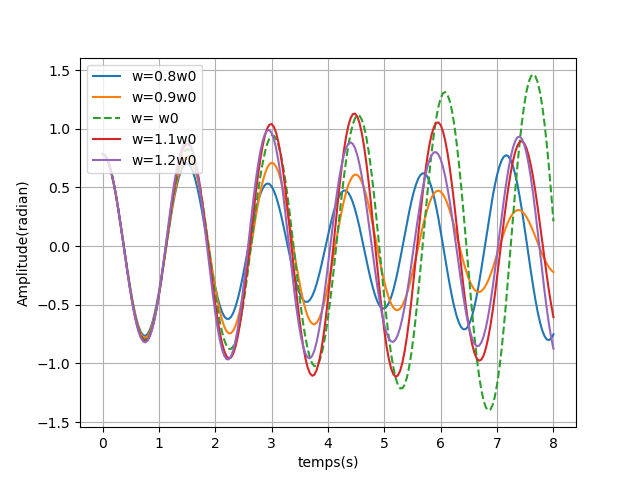

In [17]:

#print(x_Heun.shape)
#return 1/2*l**2*x[1]**2-g*l*np.cos(x[0])
#E_Heun = 1/2*l**2*x_Heun[:,1]**2 -g*l*np.cos(x_Heun[:,0])
#print(E_Heun.shape)
w0 = np.sqrt(g/l)

fig = plt.figure('Simulation excitation de pendule méthode de Heun h= '+str(h))
for scale in [0.8,0.9,1,1.1,1.2]:
    w = scale*w0
    x_Heun = [x0.copy()]
    for i in range(nbrStep):
        x_Heun += [Heun(x_Heun[-1],i*h)]
    x_Heun = np.array(x_Heun) 
    if scale == 1:
        plt.plot(time,x_Heun[:,0],label='w= w0',linestyle = 'dashed')
    else:
        plt.plot(time,x_Heun[:,0],label='w='+str(scale)+"w0")
plt.xlabel('temps(s)')
plt.ylabel('Amplitude(radian)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

>  Donner une interprétation des résultats observés. 

>**Remarque**: En analysant la figure, on peut constate deux observations interessantes:<br>
>
> - L'amplitude du pendule est plus grande quand $\omega$ = $\omega_0$, la fréquence de la force extérieure est égale à celle de pendule.
> - La fréquence d'oscillation est conservée, elle reste à $\omega_0$.
>
>Ce résultat s'explique par le fait qu'a lieu une résonnace. C'est un terme utilisé très souvent dans les physiques. En quelques mots, la résonnance s'est produit quand il y a une synchronisation entre les éléments.

## Portrait de phase
Nous allons maintenant tracer le portrait de phase pour l'équation du pendule. Il s'agit de tracer sur un même graphe les courbes $\{ (\theta(t),\theta'(t), \ t \in I \}$, où $I$ est le domaine de définition de la solution, pour plusieurs données initiales. On fera varier la donnée initiale $\theta(0)$ de $-10$ à $10$ et $\theta'(0)$ de $-7$ à $7$.

>  **A faire:** Tracer le portrait de phase en utilisant la méthode de Heun. 

<IPython.core.display.Javascript object>


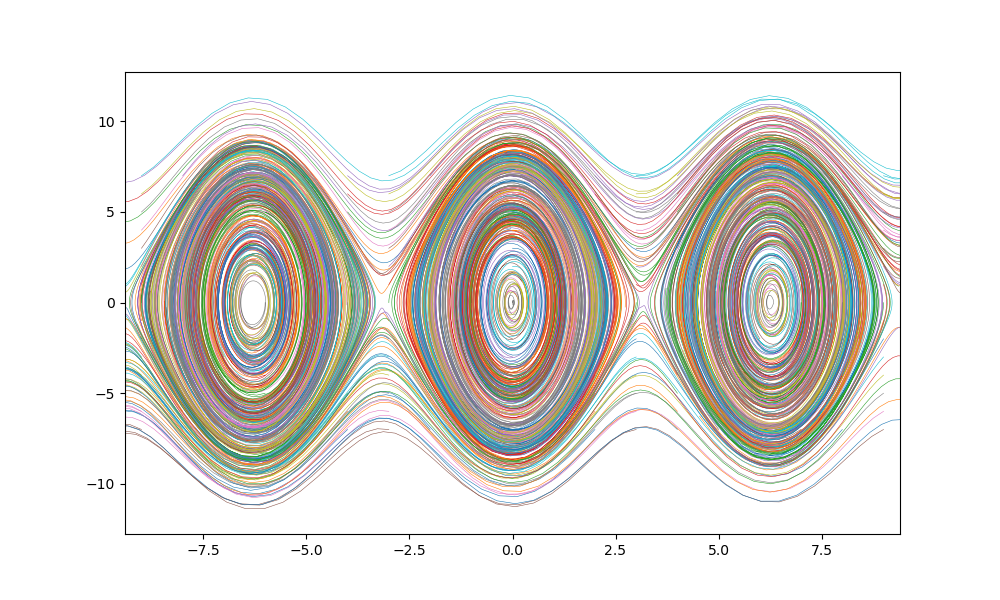

In [18]:
#portrait de phase excite
fig = plt.figure('portrait de phase excité dt='+str(h),figsize=(10,6))
axs = fig.add_subplot(111)
for theta in range(-10,11):
    for thetap in range(-7,8):
        x0 = np.array([theta,thetap])
        x_Heun = [x0.copy()]
        for i in range(nbrStep):
            x_Heun += [Heun(x_Heun[-1],i*h)]
        x_Heun = np.array(x_Heun) 
        plt.plot(x_Heun[:,0],x_Heun[:,1],lw=0.4)
axs.set_xlim(-9.4,9.4)
plt.show()

<IPython.core.display.Javascript object>


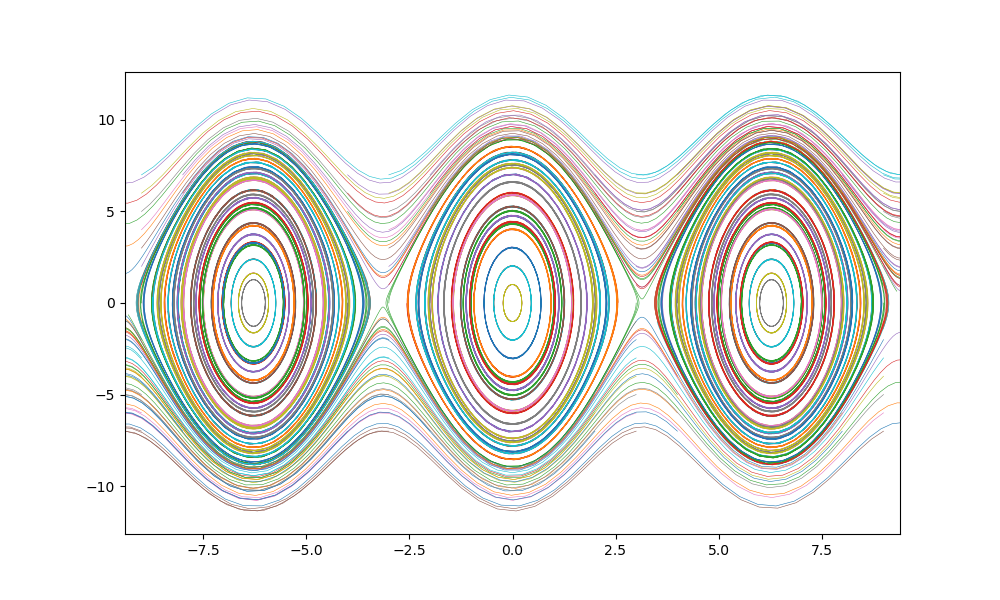

In [19]:
#portrait de phase non excite
fig = plt.figure('portrait de phase non excité dt='+str(h),figsize=(10,6))
axs = fig.add_subplot(111)
for theta in range(-10,11):
    for thetap in range(-7,8):
        x0 = np.array([theta,thetap])
        x_heun = [x0.copy()]
        for i in range(nbrStep):
            x_heun += [heun(x_heun[-1])]
        x_heun = np.array(x_heun) 
        plt.plot(x_heun[:,0],x_heun[:,1],lw=0.4)
axs.set_xlim(-9.4,9.4)
plt.show()

In [20]:
x0=np.array([np.pi/4,0])

## Systèmes hamiltoniens
L'équation du pendule fait partie d’une classe de problèmes provenant de la mécanique Hamiltonienne qui se mettent sous la forme (en dimension $1$) :
$$
\left \{
\begin{array}{l}
\displaystyle p' = -\frac{\partial H}{\partial q}(p,q)\\
\displaystyle q' = \frac{\partial H}{\partial p}(p,q)
\end{array}
\right.
$$
La particularité de ces systèmes est que le Hamiltonien, $H$, est conservé au cours de l'évolution. Au niveau mécanique, ceci correspond à la conservation de l'énergie mécanique que nous avons déjà vu.
Lorsque l'on intègre des systèmes de ce type, il est préférable d'adopter un schéma pour lequel $H$ reste borné.

Implémenter le schéma suivant, dit Euler symplectique :
$$
\left \{
\begin{array}{l}
\displaystyle p^{n+1} = p^n - h \frac{\partial H}{\partial q}(p^{n+1},q^n)\\
\displaystyle q^{n+1} = q^n + h \frac{\partial H}{\partial p}(p^{n+1},q^n)
\end{array}
\right.
$$
Ce schéma est semi-implicite (il n'est implicite qu'en la variable $p$) dans le cas général. Dans le cadre qui nous intéresse, il est explicite.
>**A faire** Programmer le schéma d'Euler symplectique et tracer l'évolution de l'énergie pour celui-ci. Commenter les résultats.

> On definit tout d'abord la fonction de Hamiltoniens: $$
\mathcal{H}(\theta'(t),\theta(t))=\frac{\mathcal{E}(t)}{m L^{2}} = \frac{1}{2} (\theta'(t))^2 - \frac{g}{l}  \cos \theta(t)= \frac{1}{2} (\theta'(t))^2 - \omega^{2}  \cos \theta(t).
$$
> On remplace alors $$
\left \{
\begin{array}{l}
\displaystyle p = \theta '\\
\displaystyle q' = \theta
\end{array}
\right.
$$
> On verifie bien que:
$$
\left \{
\begin{array}{l}
\displaystyle p'= \theta'' = -\frac{\partial H}{\partial q}(p,q) = -\omega^{2} \sin(\omega) \\
\displaystyle q'= \theta' = \frac{\partial H}{\partial p}(p,q)
\end{array}
\right.
$$
>**L'implémentation numérique est le suivante:**$
\left \{
\begin{array}{l}
\displaystyle \theta'_{n+1} = \theta'_n-h\omega^{2}\sin(θ_n) \\
\displaystyle \theta_{n+1} = \theta_{n} + h\theta'_{n+1}
\end{array}
\right.
$

In [22]:
### Definition de  fonction Hamiltonnien
def H(x):
    return 1/2*x[1]**2-w0**2*np.cos(x[0])

### La mise en oeuvre de schéma d'Euler symplectique
def Euler_symp(x):
    y = np.zeros(2)
    y[1] = x[1] - h*w0**2*np.sin(x[0])
    y[0] = x[0] + h*y[1]
    return y


>On calcule l'évolution de l'amplitude $\theta$ et de la vitesse $\theta'$:

<IPython.core.display.Javascript object>


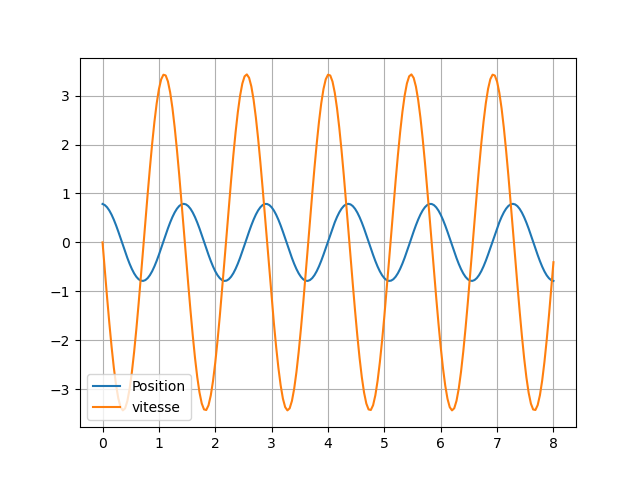

In [23]:
### Implementer le schéma par le loop
x_eulerSym = [x0.copy()]
for i in range(nbrStep):
    x_eulerSym += [Euler_symp(x_eulerSym[-1])]
x_eulerSym = np.array(x_eulerSym)


### On fait le graphe de l'évolution de l'amplitude et de la vitesse du pendule
fig = plt.figure('Simulation du pendule par la methode de Euler symplecitque avec h='+str(h))
plt.plot(time,x_eulerSym[:,0],label='Position')
plt.plot(time,x_eulerSym[:,1],label='vitesse')
plt.legend()
plt.grid()
plt.show()

In [24]:
### L'evolution de l'energie du pendule au cours de temps
E_eulerSym = E(x_eulerSym)

<IPython.core.display.Javascript object>


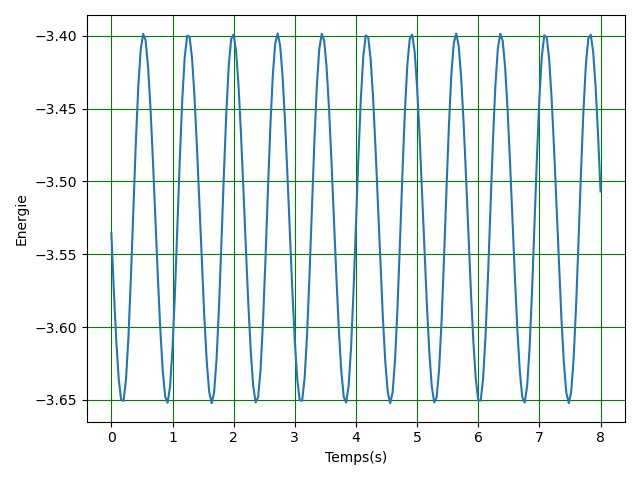

In [25]:
fig = plt.figure('Evolution d l\'energie par la méthode Euler symplecitque avec dt='+str(h))
plt.plot(time,E_eulerSym)
plt.xlabel('Temps(s)')
plt.ylabel('Energie')
plt.grid(color='green')
plt.tight_layout()
plt.show()

> On remarque bien que la courbe d'energie est ressemblant à une courbe sinusoidale et la variation est très peu, l'erreur relative est donné par:$$\epsilon \approx \frac{|3.40-3.535|}{3.535} \approx 3,81\% $$

> L'avantage de Hamiltonienne méthode est ce que l'erreur ne depend pas du temps finale $T$, l'energie est ainsi mieux conservée par rapport aux quartre schémas précedents. Les systèmes Hamiltoniens ont donc règlé le problème qu'on a commit avec les méthodes Euler explicite, Heun, RK2 et RK4. 

## Euler implicite
On a bien exprimenté les schémas explicite, pour aller plus loin, on voudrait essayer de résoudre le problème de pendule avec le schéma de Euleur implicite.<br>
D'après les cours, le schéma de Euler implicite est comme suivante:
$\left\{\begin{array}{ll}
X_{n+1} = X_{n} + h F(X_{n+1}), (\star)
\\ X_{0} = X(0) = (\frac{\pi}{4},0)
\end{array}\right.$ <br> <br>

On reformule l'équation $(\star)$ : $X_{n+1} - X_{n} - h F(X_{n+1}) = 0$ <br>
On definit ensuite: $$G(X)= X- X_{n} - h F(X) $$
Pour trouver $X_{n+1}$, il s'agit de résoudre l'équation $G(X) = 0$  <br>
On le fait en utilisant la méthode de Newton:
$$ X_{k+1} = X_{k} - J_G(X_{k})^{-1} G(X_{k})$$<br>
Le matrice Jacobienne de G est donnée par:$$J_G(X_{k}) = I_{2} - h J_F(X_{k})   \quad avec\quad  J_F(X_{k}) = \begin{bmatrix}
    0 & 1 \\
    -\omega^{2}\sin(X_{k}) & 0  \\
\end{bmatrix}$$


In [26]:
### Definition de Jacobienne matrice de F  
def dF(x):
    dF = [[0, 1],
            [-w**2*np.cos(x[0]),0]]
    return np.array(dF)

In [27]:
### Definition la fonction G et sa matrice Jacobienne
def G_dG(x, Xn):
    G = x - h*F(x) - Xn
    dG = np.identity(2) -h*dF(x)
    return G,dG

In [28]:
### Definition la fonction de methode de Newton qui nous aide à trouver Xn+1
### Les critière d'arrete sont le nombre maximal d'itération et le norme de G
def Newton(x_ini,Xn,eps=1e-10,itermax=500):
    x = x_ini.copy()
    G,dG = G_dG(x,Xn)
    crit = npl.norm(G)
    i = 0
    while i < itermax and crit > eps:
        dk = npl.solve(dG,G)
        x = x - dk
        G,dG = G_dG(x,Xn)
        crit = npl.norm(G)
        i+=1
    return x

(201, 2)


<IPython.core.display.Javascript object>


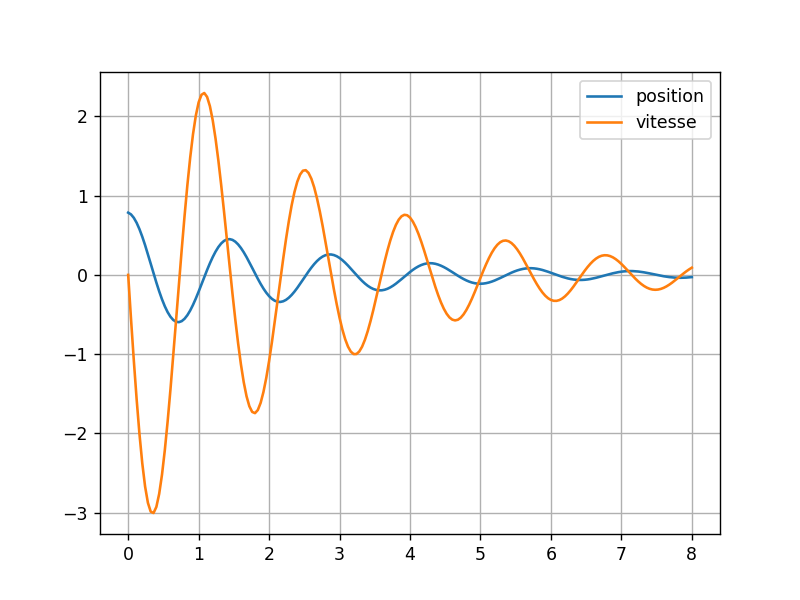

In [40]:

x_imp = [x0.copy()]
for i in range(nbrStep):
    x_imp+=[Newton(x_imp[-1],x_imp[-1])]
x_imp = np.array(x_imp)
print(x_imp.shape)


#### On trace la graphique de l'amplitude et la vitesse du pendule au cours de temps
fig = plt.figure('La Simulation pendule methode de Euler implicite h='+str(h)+"s")
plt.plot(time,x_imp[:,0],label='position')
plt.plot(time,x_imp[:,1],label='vitesse')
plt.grid()
plt.legend()
plt.show()

>**Remarque**: Le schéma implicite nous donne une mauvais simulation du pendule. En effet, l'amplitude et la vitesse convergent vers 0, il s'agit d'un système dissipatif qui s'annule au cours de temps. Apparemment, on n'est pas dans ce cas.